In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-deaths-predict-conditions-contributing/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv


# Data Pre-processing

In [2]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df= pd.read_csv('/kaggle/input/covid-19-deaths-predict-conditions-contributing/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv')
df.head()

,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1569.0,1647.0,NaN
1,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5804.0,6029.0,NaN
2,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15080.0,15699.0,NaN
3,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37414.0,38878.0,NaN
4,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82668.0,85708.0,NaN


In [4]:
# Basic structure and summary
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621000 entries, 0 to 620999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Start Date          621000 non-null  object 
 1   End Date            621000 non-null  object 
 2   Group               621000 non-null  object 
 3   Year                608580 non-null  float64
 4   Month               558900 non-null  float64
 5   State               621000 non-null  object 
 6   Condition Group     621000 non-null  object 
 7   Condition           621000 non-null  object 
 8   ICD10_codes         621000 non-null  object 
 9   Age Group           621000 non-null  object 
 10  COVID-19 Deaths     437551 non-null  float64
 11  Number of Mentions  443423 non-null  float64
 12  Flag                183449 non-null  object 
dtypes: float64(4), object(9)
memory usage: 61.6+ MB
None
                Year          Month  COVID-19 Deaths  Number of Mentions
count  6

In [5]:
# Handling missing values (example: filling NaN in 'Year' and 'Month' with a placeholder)
df['Year'].fillna('Unknown', inplace=True)
df['Month'].fillna('Unknown', inplace=True)

# Convert 'Start Date' and 'End Date' to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

/tmp/ipykernel_18/3159949710.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna('Unknown', inplace=True)
/tmp/ipykernel_18/3159949710.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Year'].fillna('Unknown', inplace=True)
/tmp/ipykernel_18/3159949710.py:3: FutureWarning: A value is trying to be set on a copy of a DataFram

# COVID-19 Deaths by Age Group

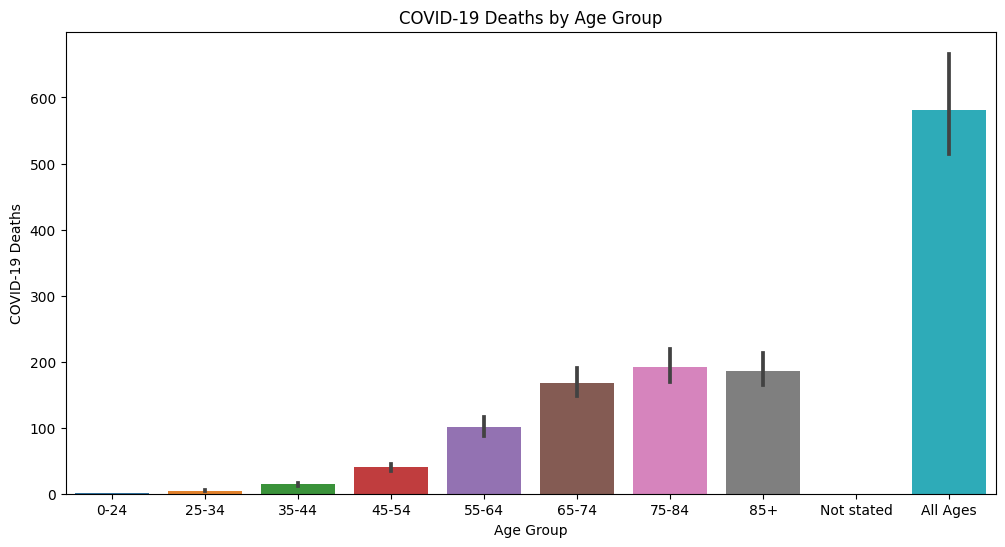

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of COVID-19 deaths by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=df)
plt.title('COVID-19 Deaths by Age Group')
plt.show()

# Trends over time (assuming 'Start Date' and 'End Date' are the same for each row)
df['Year'] = df['Start Date'].dt.year
df_grouped = df.groupby('Year')['COVID-19 Deaths'].sum().reset_index()



# COVID-19 Deaths Over Time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


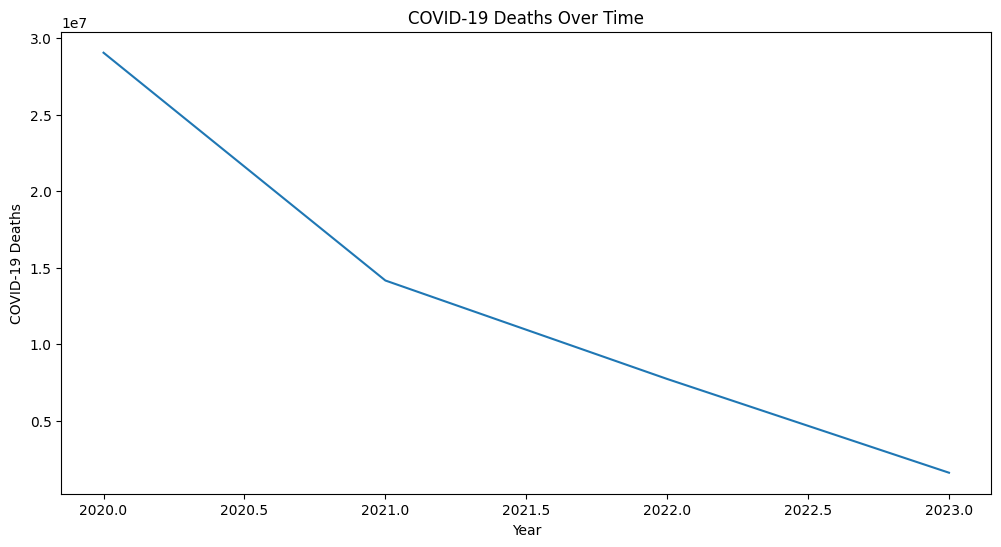

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='COVID-19 Deaths', data=df_grouped)
plt.title('COVID-19 Deaths Over Time')
plt.show()


# COVID-19 Deaths Over Time by Condition Group

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

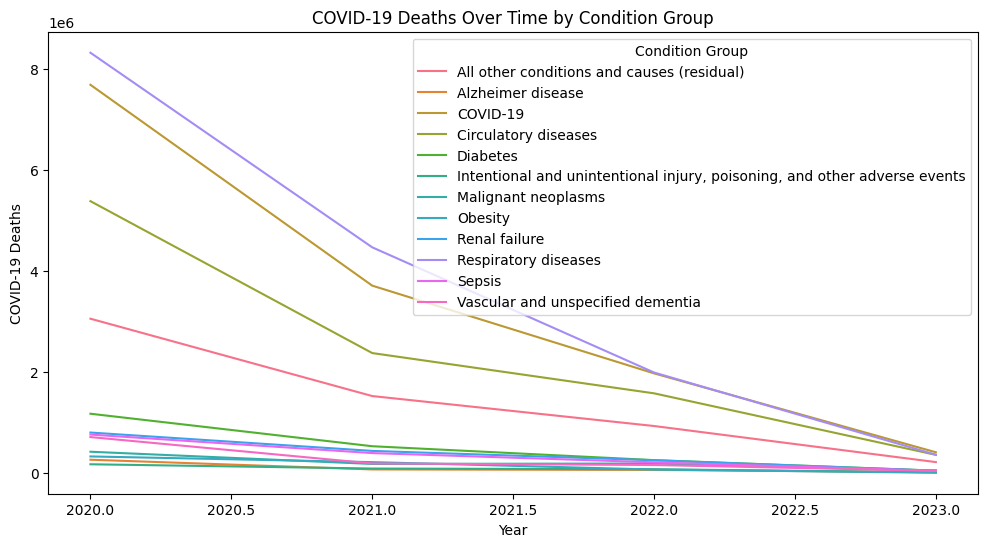

In [8]:
df_grouped_condition = df.groupby(['Year', 'Condition Group'])['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='COVID-19 Deaths', hue='Condition Group', data=df_grouped_condition)
plt.title('COVID-19 Deaths Over Time by Condition Group')
plt.show()


# Heatmap of COVID-19 Deaths by Age Group and Condition Group

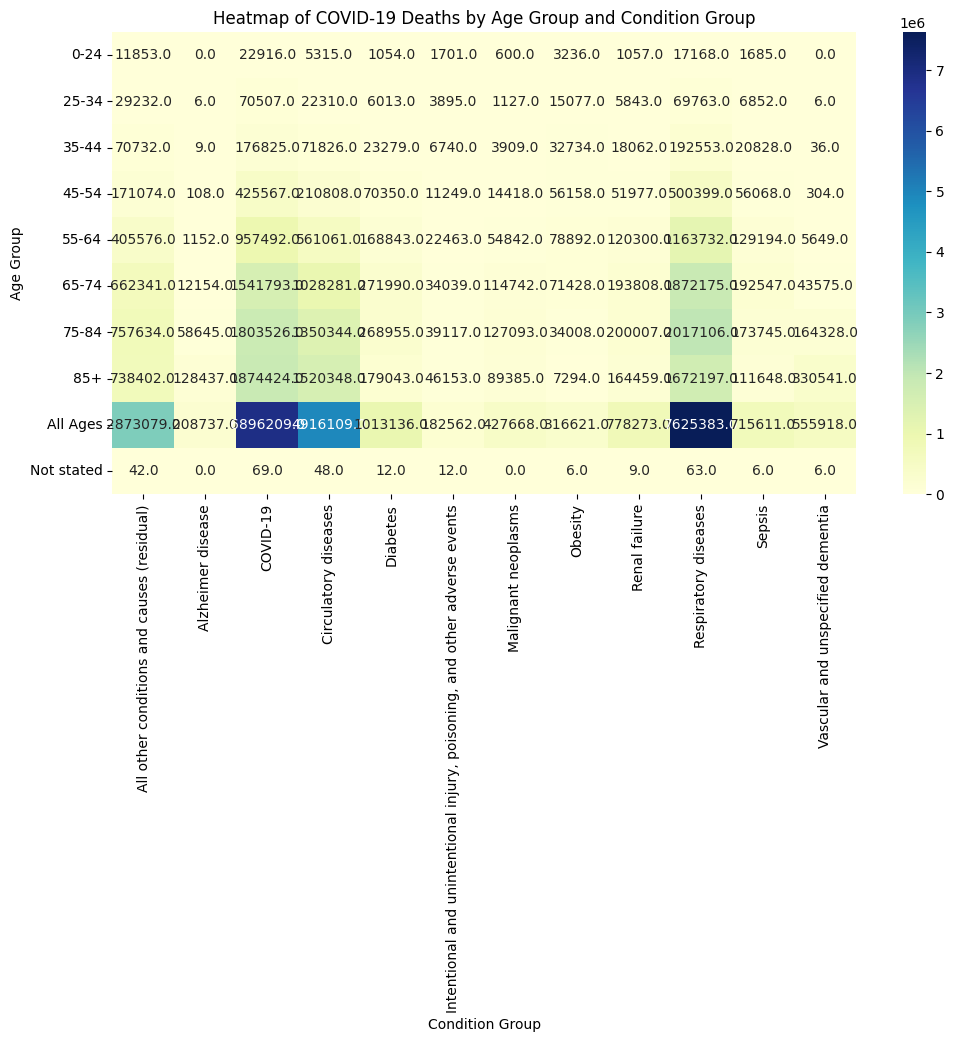

In [9]:
df_pivot = df.pivot_table(values='COVID-19 Deaths', index='Age Group', columns='Condition Group', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of COVID-19 Deaths by Age Group and Condition Group')
plt.show()


# COVID-19 Deaths by Month

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


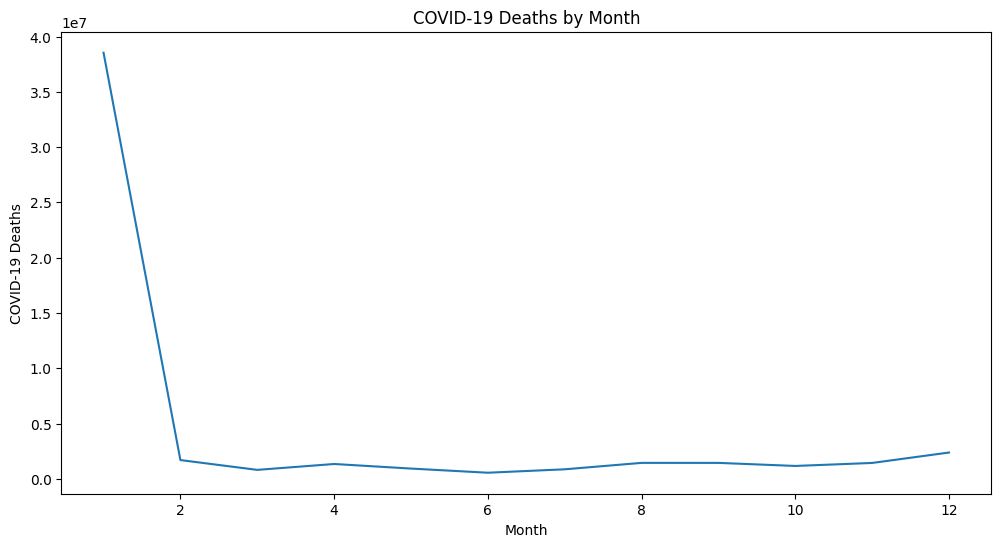

In [10]:
df['Month'] = df['Start Date'].dt.month
df_grouped_month = df.groupby('Month')['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='COVID-19 Deaths', data=df_grouped_month)
plt.title('COVID-19 Deaths by Month')
plt.show()


# Distribution of each column

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    # Calculate number of unique values in each column
    nunique = df.nunique()
    
    # Select columns with unique values between 2 and 50 for visualization
    df = df[[col for col in df.columns if 1 < nunique[col] < 50]]
    
    nRow, nCol = df.shape
    columnNames = list(df.columns)
    
    # Calculate the number of rows needed for subplots
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    
    # Create a figure for the subplots
    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        # Check if the column data is categorical or numerical
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist(bins=30)
        
        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    # Adjust layout
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


/tmp/ipykernel_18/2251746812.py:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)


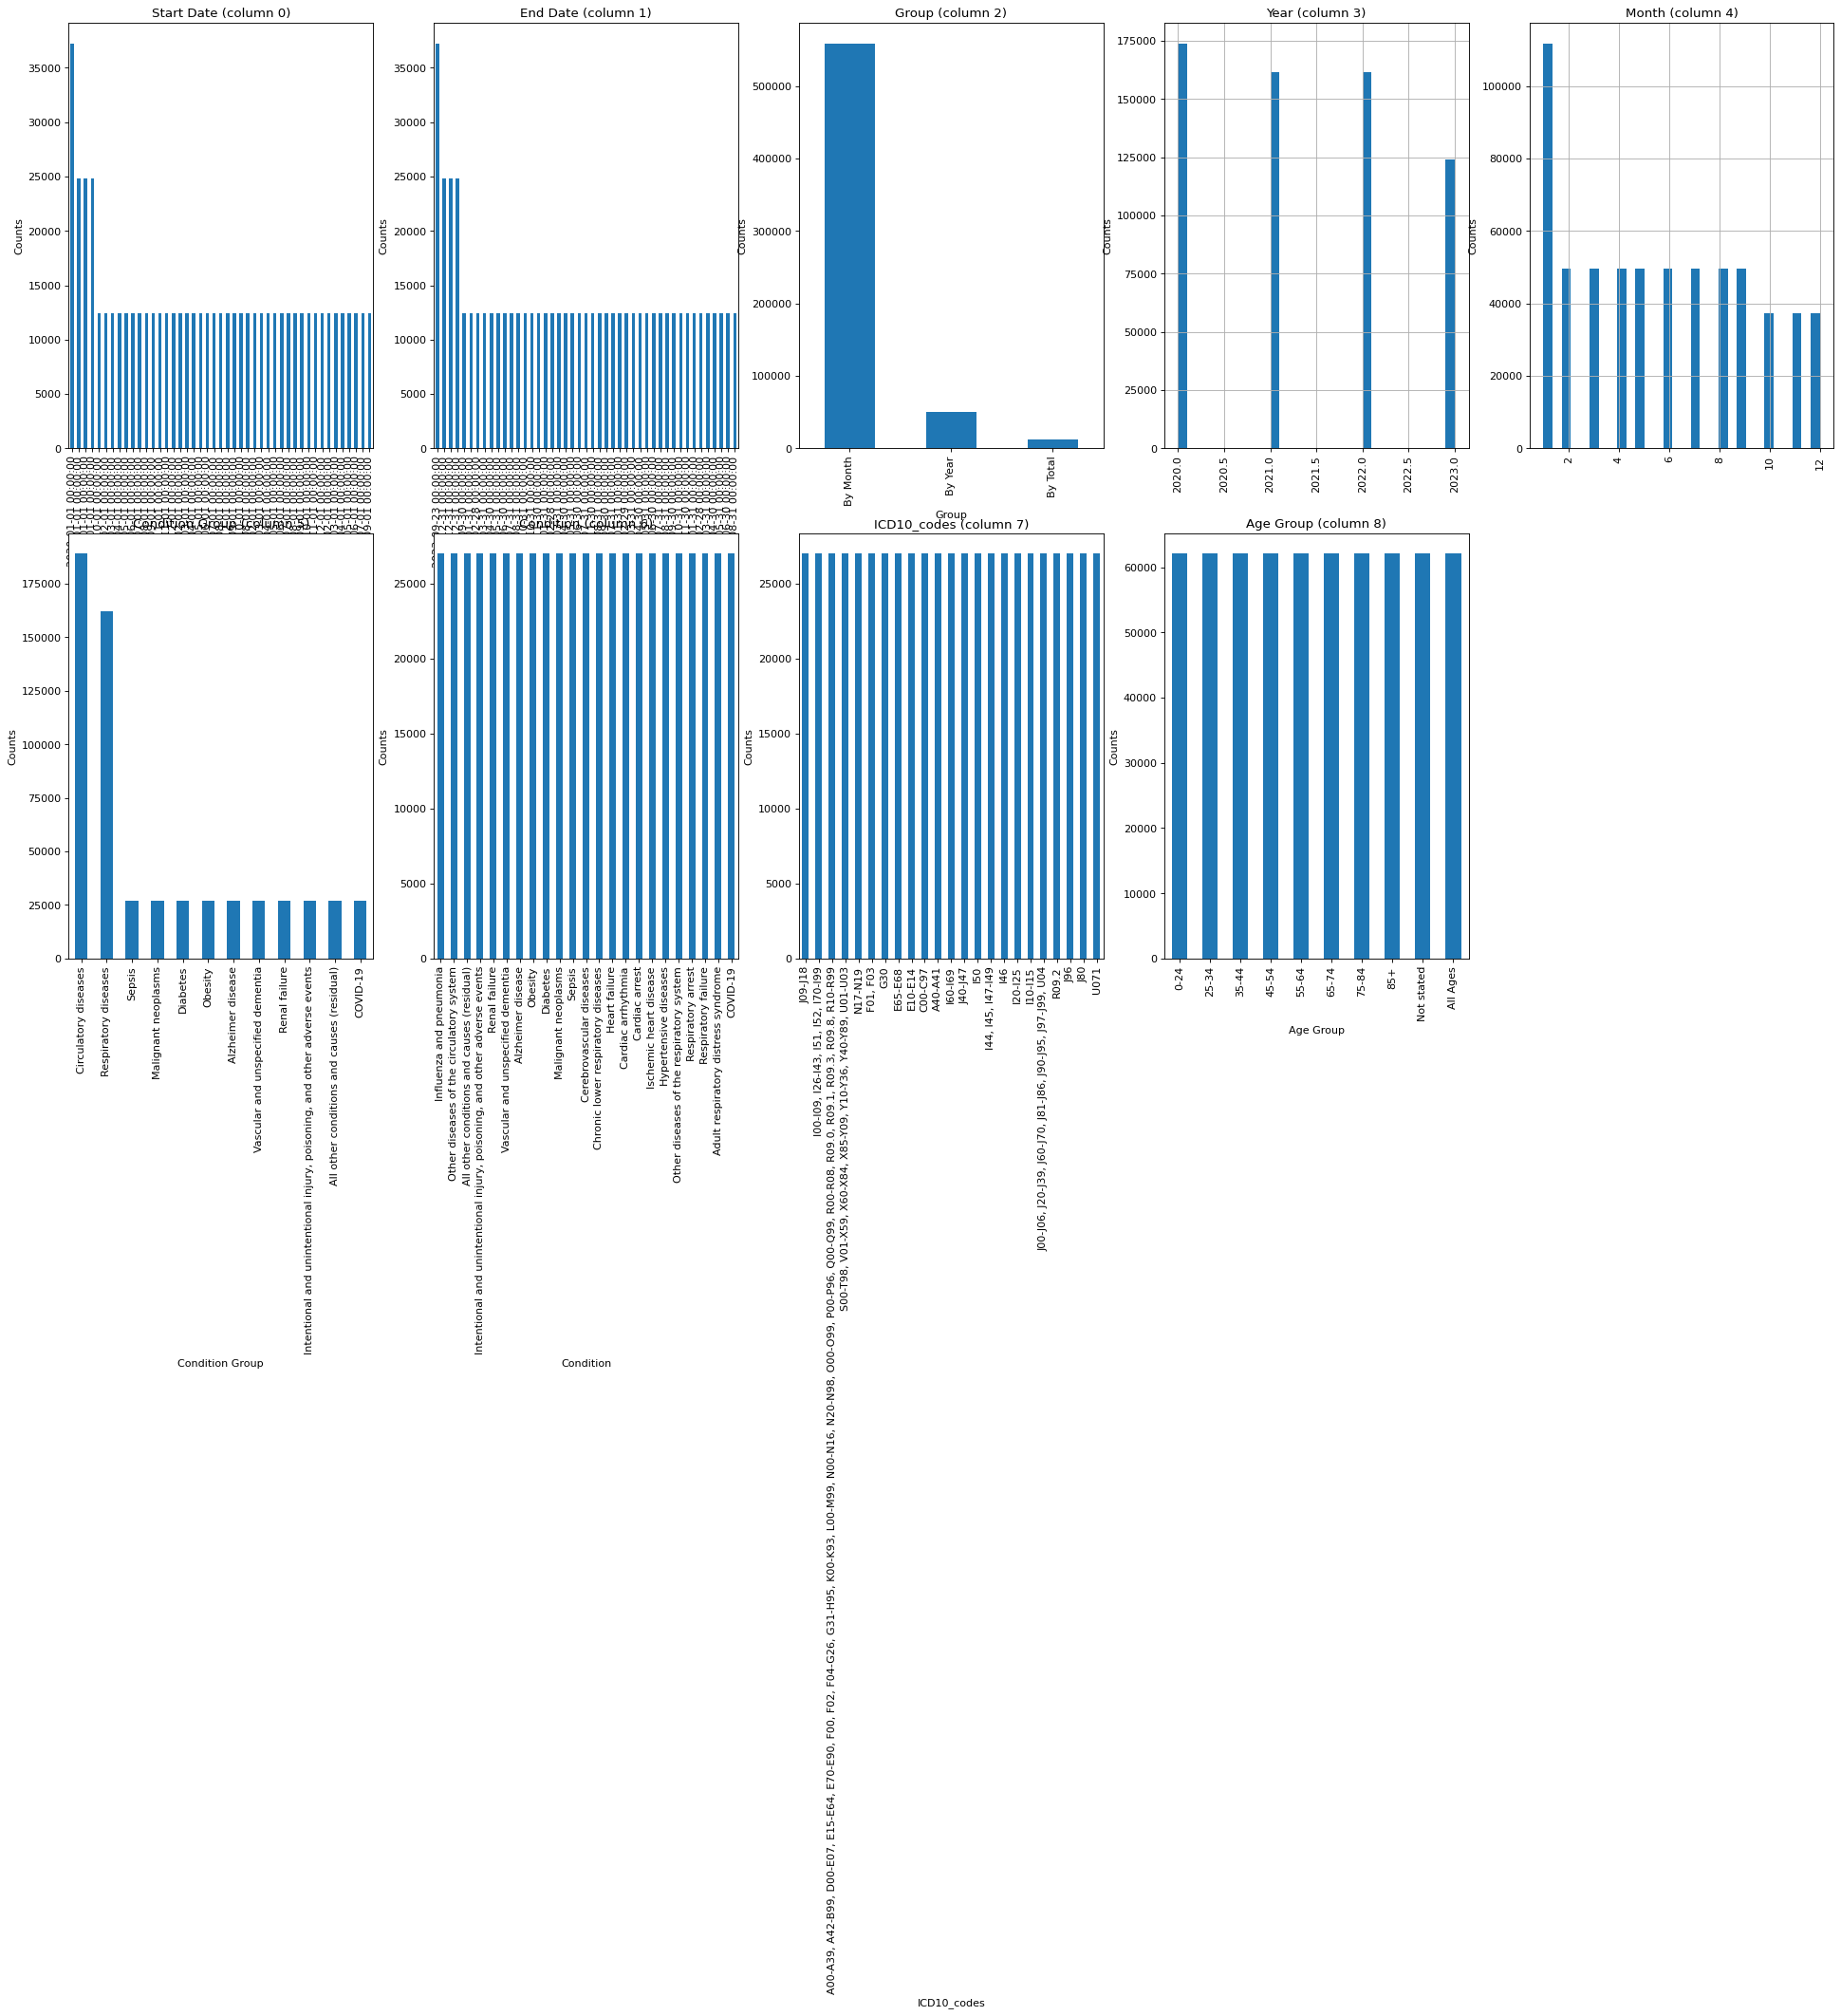

In [12]:
plotPerColumnDistribution(df, 10, 5)

# Scatter and Density Plot

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])
    # Drop columns with NaN values
    df = df.dropna(axis=1)
    # Keep columns with more than 1 unique value
    df = df[[col for col in df.columns if df[col].nunique() > 1]]
    columnNames = list(df.columns)
    # Reduce the number of columns if there are more than 10
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    # Create the scatter matrix
    ax = scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')   
    # Calculate the correlation matrix
    corrs = df.corr().values    
    # Annotate the correlation coefficients
    for i, j in zip(*np.triu_indices_from(corrs, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.5, 0.1), xycoords='axes fraction', ha='center', va='center', size=textSize)  
    plt.suptitle('Scatter and Density Plot')
    plt.show()



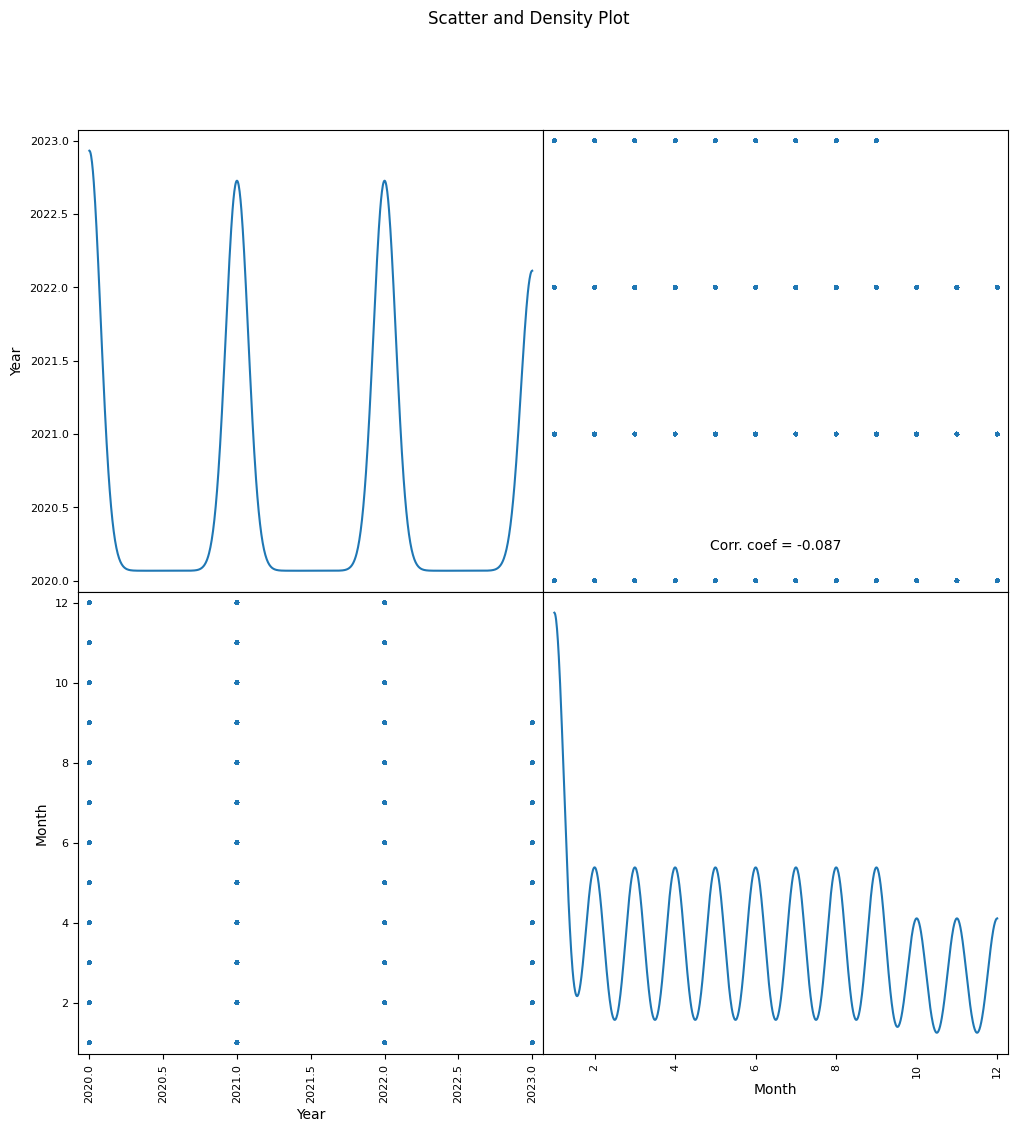

In [14]:
plotScatterMatrix(df, 12, 10)
